<a href="https://colab.research.google.com/github/ayswaryashok176/Lok_Sabha-Result/blob/main/Lok_Sabha_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!git clone https://github.com/ayswaryashok176/Lok_Sabha-Result.git

Cloning into 'Lok_Sabha-Result'...


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns
import geopandas as gpd
import shapefile as shp
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [46]:
data = pd.read_csv('election_results_2024.csv')

**Collection of Lok Sabha Elections 2024**


In [5]:
candidates= pd.read_csv("/content/candidates_with_phase.csv")
results= pd.read_csv("/content/results_2024.csv")
winners= pd.read_csv("/content/results_2024_winners.csv")

**Data of Candidates**

In [6]:
candidates.head()


,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husbands Name,Photo Link,Phase,Polling Date
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42,Brindaban,"27th March, 2024",Accepted,V.M. KOCHUNNI,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39,"Dollygunj Village, Port Blair Tehsil, South An...","27th March, 2024",Accepted,S B GURUNG,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,RINKU MALA MONDAL,female,36,"Lokenath Colony, Dollygunj","27th March, 2024",Accepted,N N MONDAL,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Indian National Congress,KULDEEP RAI SHARMA,male,56,"M.B.167, M.G. Road, Junglighat, Port Blair - 7...","27th March, 2024",Accepted,BHAGAT SINGH,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,ANAND RAMNATH ARLEKAR,male,58,"Panipath Road, Haddo","27th March, 2024",Accepted,RAMNATH ARLEKAR,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024


**Youngest Candidate who participated in Lok Sabha Election**

In [55]:
candidate_age = candidates[candidates['Age'] > 18]
candidate_age[candidate_age['Age'] == candidate_age['Age'].min()]

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,Address,Application Date,Application Status,Father/Husbands Name,Photo Link,Phase,Polling Date
105,Andhra Pradesh,6,Kakinada,Bharatha Chaitanya Yuvajana Party,DR ANUSHA YADAV,female,25,"4-184, Krishnalayam Street, Peddipalem Village...","19th April, 2024",Accepted,DARABABU CHANDAKA,https://results.eci.gov.in/uploads4/candprofil...,4,13-05-2024
184,Andhra Pradesh,11,Machilipatnam,Independent,ANUSHA YERUVA,female,25,"1-142-33/10 , SHIVAGANGA , KHALEKHANPETA MACHI...","25th April, 2024",Accepted,RAMARAO YERUVA,https://results.eci.gov.in/uploads4/candprofil...,4,13-05-2024
279,Andhra Pradesh,16,Ongole,Independent,VESHAPOGU GURAVABABU,male,25,"D.NO 1-32, YADAVALLI VILLAGE, PEDADORNALA MAND...","26th April, 2024",Accepted,V DANAMAIAH,https://results.eci.gov.in/uploads4/candprofil...,4,13-05-2024
450,Andhra Pradesh,24,Rajampet,Independent,DODDAPANENI RAJA NAIDU,male,25,"Flat No.108, Green Park Apartment , Bypass Roa...","22nd April, 2024",Accepted,Doddapaneni Chandrasekhar Naidu,https://results.eci.gov.in/uploads4/candprofil...,4,13-05-2024
778,Bihar,15,Muzaffarpur,Indian National League,SABINA KHATOON,female,25,"LELIN SARANI ROAD, NEAR -KALI MANDIR, LOWER BH...","3rd May, 2024",Accepted,MD IBRAHIM,https://results.eci.gov.in/uploads4/candprofil...,5,20-05-2024
898,Bihar,23,Samastipur,Lok Janshakti Party(Ram Vilas),SHAMBHAVI,female,25,"55 MAHAVIR VILLA, MAHAVIR LANE, EAST BORING CA...","19th April, 2024",Accepted,ASHOK CHOUDHARY,https://results.eci.gov.in/uploads4/candprofil...,4,13-05-2024
1106,Bihar,38,Gaya,Independent,AYUSH KUMAR,male,25,"Vill-PO-Kathautiya, Block-Gurua, District-Gaya","28th March, 2024",Accepted,MADAN PASWAN,https://results.eci.gov.in/uploads4/candprofil...,1,19-04-2024
1155,Chhattisgarh,1,SURGUJA,Independent,PRINCE ABHISHEK KUJUR,male,25,"Majhapara, Village-Ganjhadand, Post-Raghunathp...","16th April, 2024",Accepted,SAMSON KUJUR,https://results.eci.gov.in/uploads4/candprofil...,3,07-05-2024
1174,Chhattisgarh,3,JANJGIR-CHAMPA,Asankhya Samaj Party,VIJAYLAXMI SURYAWANSHI NAT,female,25,"Mu. Po.- Mahant, Tehsil- Nawagarh, Dist- Janjg...","16th April, 2024",Accepted,MAJNURAM NAT,https://results.eci.gov.in/uploads4/candprofil...,3,07-05-2024
1189,Chhattisgarh,4,KORBA,Independent,RAMESH DAS MAHANT,male,25,"7/A, Rathore and Karsh Mohalla, Village - Soni...","19th April, 2024",Accepted,LAXMAN DAS MAHANT,https://results.eci.gov.in/uploads4/candprofil...,3,07-05-2024


**FINDINGS 1:**

So, the youngest candidate age is 25 years.

---



In [62]:
num_males = candidates[candidates['Gender'] == 'male'].shape[0]
num_females = candidates[candidates['Gender'] == 'female'].shape[0]
print(f'Number of male candidates: {num_males}')


Number of male candidates: 7634


In [65]:
print(f'Number of female candidates: {num_females}')

Number of female candidates: 801


**FINDINGS 2:**

Number of female candidates:801

Number of male candidates: 7634

**Distribution of Male and Female Candidates**

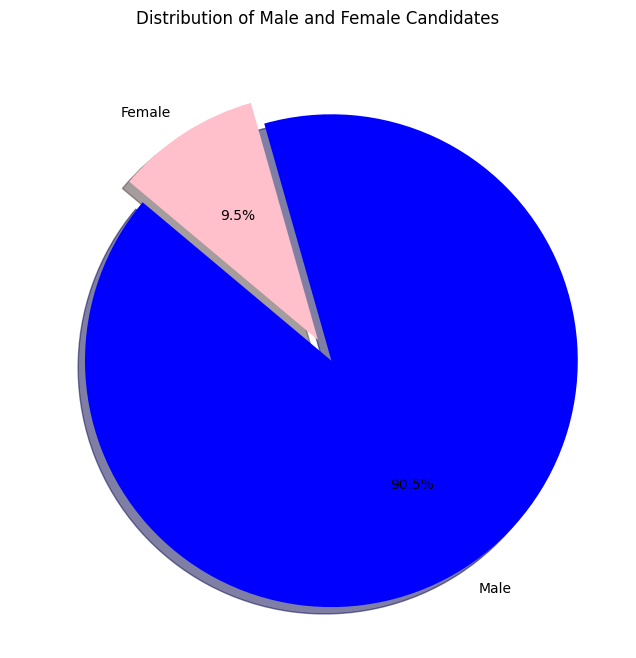

In [66]:
labels = 'Male', 'Female'
sizes = [num_males, num_females]
colors = ['blue', 'pink']
explode = (0.1, 0)  # explode 1st slice (Male)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Distribution of Male and Female Candidates')
plt.show()

In [7]:
C_data=candidates.drop(['Address', 'Application Date', 'Application Status', 'Father/Husbands Name','Photo Link','Polling Date','Phase' ], axis = 1)

**Results of the election**

In [8]:
results.head()


,State,PC No,PC Name,Sl no,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),1,GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96
1,Andhra Pradesh,1,Araku (ST),2,KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425,36.62
2,Andhra Pradesh,1,Araku (ST),3,APPALANARASA PACHIPENTA,Communist Party of India (Marxist),119016,4113,123129,10.57
3,Andhra Pradesh,1,Araku (ST),4,AVASHYA LAHARI . VARAM,Bahujan Samaj Party,24858,892,25750,2.21
4,Andhra Pradesh,1,Araku (ST),5,SAMAREDDY BALAKRISHNA,Independent,9493,42,9535,0.82


In [9]:
R_data= results.drop(['Sl no'], axis = 1)

In [10]:
data_merge=pd.concat([C_data,R_data], axis = 0)
data_merge.head(10)

,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,PC No,PC Name,Candidate,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,RINKU MALA MONDAL,female,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Indian National Congress,KULDEEP RAI SHARMA,male,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,ANAND RAMNATH ARLEKAR,male,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,K VENKAT RAM BABU,male,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Socialist Unity Centre Of India (COMMUNIST),SALAMAT MONDAL,male,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,All India Anna Dravida Munnetra Kazhagam,K J B SELVARAJ,male,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Andaman Nicobar Democratic Congress,MANOJ PAUL,male,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Communist Party of India (Marxist),D AYYAPPAN,male,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Winners Data**

In [11]:
winners.head()

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes,Results Status
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196,Result Declared
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530,Result Declared
2,Andhra Pradesh,19,Ananthapur,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555,Result Declared
3,Andhra Pradesh,1,Araku (ST),GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580,Result Declared
4,Andhra Pradesh,15,Bapatla (SC),KRISHNA PRASAD TENNETI,Telugu Desam,NANDIGAM SURESH BABU,Yuvajana Sramika Rythu Congress Party,208031,Result Declared


In [12]:
W_data= winners.drop(['Results Status'],axis=1)

**Data Cleaning**

In [13]:
C_data.head()


,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age
0,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42
1,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39
2,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,RINKU MALA MONDAL,female,36
3,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Indian National Congress,KULDEEP RAI SHARMA,male,56
4,Andaman & Nicobar Islands,1,Andaman & Nicobar Islands,Independent,ANAND RAMNATH ARLEKAR,male,58


In [14]:
R_data.head()

,State,PC No,PC Name,Candidate,Party,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andhra Pradesh,1,Araku (ST),GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,471470,5535,477005,40.96
1,Andhra Pradesh,1,Araku (ST),KOTHAPALLI GEETHA,Bharatiya Janata Party,417113,9312,426425,36.62
2,Andhra Pradesh,1,Araku (ST),APPALANARASA PACHIPENTA,Communist Party of India (Marxist),119016,4113,123129,10.57
3,Andhra Pradesh,1,Araku (ST),AVASHYA LAHARI . VARAM,Bahujan Samaj Party,24858,892,25750,2.21
4,Andhra Pradesh,1,Araku (ST),SAMAREDDY BALAKRISHNA,Independent,9493,42,9535,0.82


In [15]:
W_data.head()

,State,PC No,PC Name,Winning Candidate,Winning Party,Runner-up Canddiate,Runner-up Party,Margin Votes
0,Andhra Pradesh,7,Amalapuram (SC),G M HARISH (BALAYOGI),Telugu Desam,RAPAKA VARAPRASADA RAO,Yuvajana Sramika Rythu Congress Party,342196
1,Andhra Pradesh,5,Anakapalle,C.M.RAMESH,Bharatiya Janata Party,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,296530
2,Andhra Pradesh,19,Ananthapur,AMBICA G LAKSHMINARAYANA VALMIKI,Telugu Desam,MALAGUNDLA SANKAR NARAYANA,Yuvajana Sramika Rythu Congress Party,188555
3,Andhra Pradesh,1,Araku (ST),GUMMA THANUJA RANI,Yuvajana Sramika Rythu Congress Party,KOTHAPALLI GEETHA,Bharatiya Janata Party,50580
4,Andhra Pradesh,15,Bapatla (SC),KRISHNA PRASAD TENNETI,Telugu Desam,NANDIGAM SURESH BABU,Yuvajana Sramika Rythu Congress Party,208031


**Checking the values in the 'State' column**

In [16]:
(W_data['State'].unique())

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'West Bengal',
       'Chhattisgarh', 'Jharkhand', 'Uttarakhand', 'Telangana',
       'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'NCT OF Delhi',
       'Lakshadweep', 'Puducherry', 'Jammu and Kashmir', 'Ladakh'],
      dtype=object)

**No of Candidate in each state VS No of total candidates**

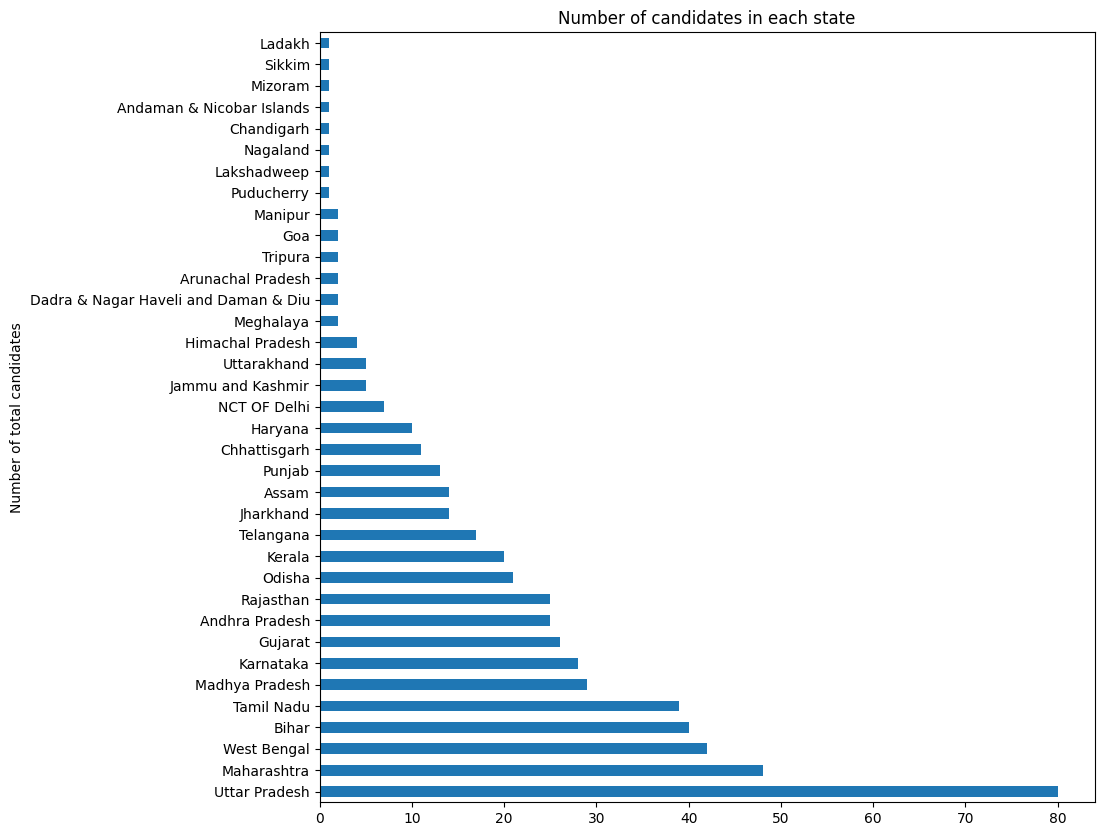

In [17]:
W_data['State'].value_counts().plot.barh(figsize = (10,10))
plt.title("Number of candidates in each state");
plt.ylabel("Number of total candidates");

**Findings 3:** Maharashtra had the fiercest competition and  Ladakh had the least.

In [18]:
len(C_data['Constituency'].unique())

541

According to the website of Election Commision of India, there are 543 constituencies. There are 2 missiing constituencies in our data.

**No of Constituencies per state Vs No of Constituencies**

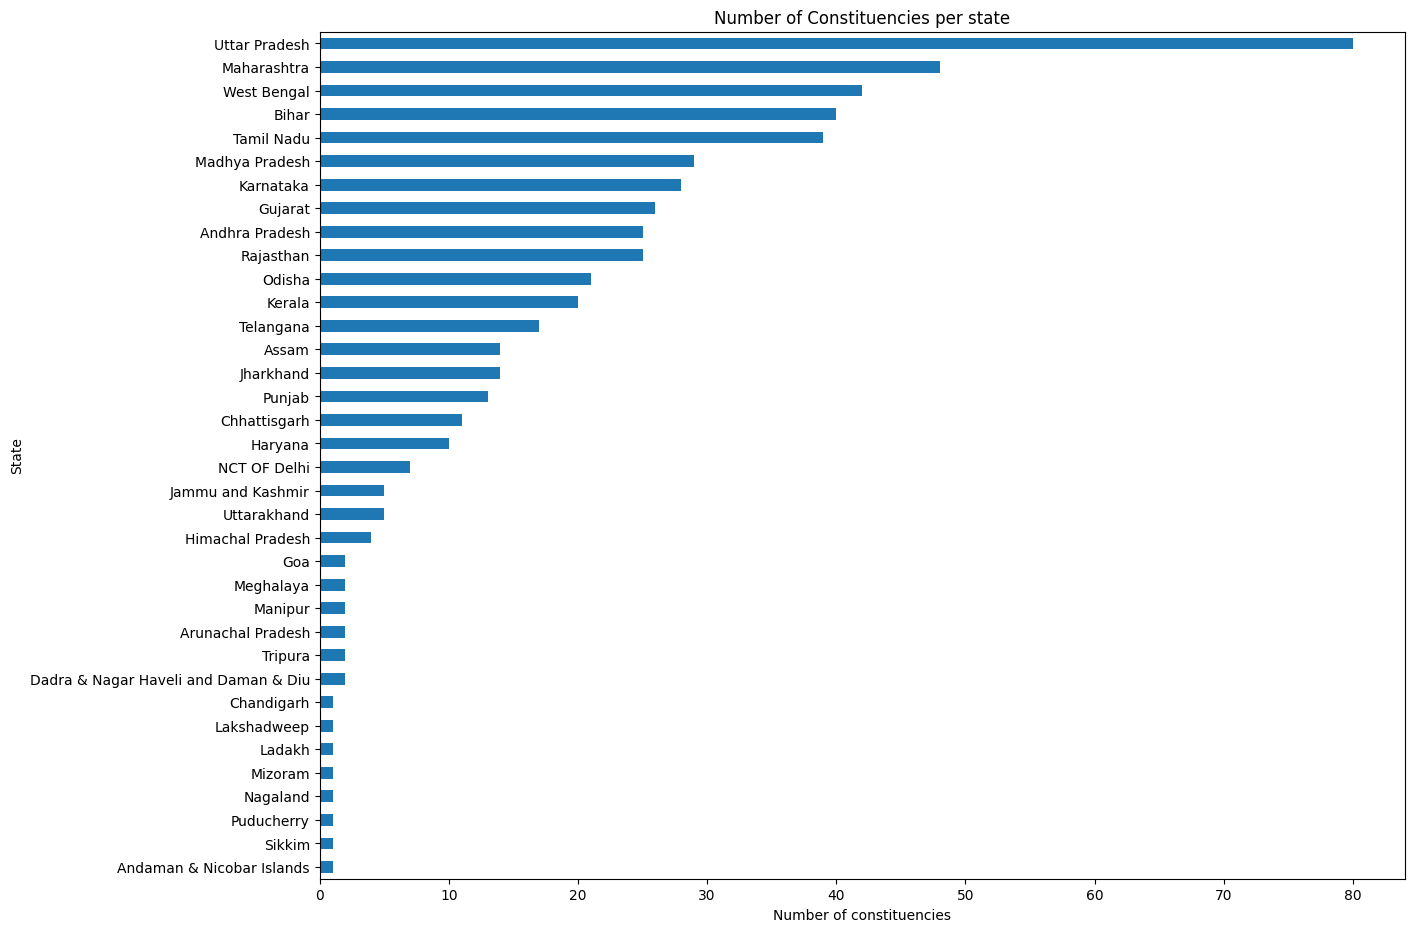

In [19]:
C_data.groupby(['State']).Constituency.nunique().sort_values().plot.barh(figsize=(14,11))
plt.title("Number of Constituencies per state")
plt.xlabel("Number of constituencies");

**FINDINGS 4:**

**1)** Uttar Pradesh had the highest number of constituencies followed by Maharashtra and West Bengal.

**2)** 8 states had the joint least number of constituencies.
 [Sikkim, Andaman &Nicobar Islands, Puducherry, Nagaland, Mizoram, Ladakh, Lakshadweep, Chandigarh]

Trying to derive some insights from the number of parties that participated in the elections

In [20]:
len(R_data['Party'].unique())

746

In [21]:
R_data['Party'].value_counts()

Party
Independent                                3920
None of the Above                           542
Bahujan Samaj Party                         488
Bharatiya Janata Party                      441
Indian National Congress                    328
                                           ... 
Tamilnadu Makkal Nalvazhvu Periyakkam         1
Jan Shakti Dal                                1
Adim Bhartiya Dal                             1
AARAKSHAN VIRODHI PARTY                       1
Akhil Bharatiya Muslim League (Secular)       1
Name: count, Length: 746, dtype: int64

In [23]:
df_one_cand = pd.DataFrame((R_data['Party']).value_counts() == 1).value_counts() #number of parties with and without 1 candidate
df_one_cand


count
False    395
True     351
Name: count, dtype: int64

**Number of parties with and without only one candidate VS Number of parties**

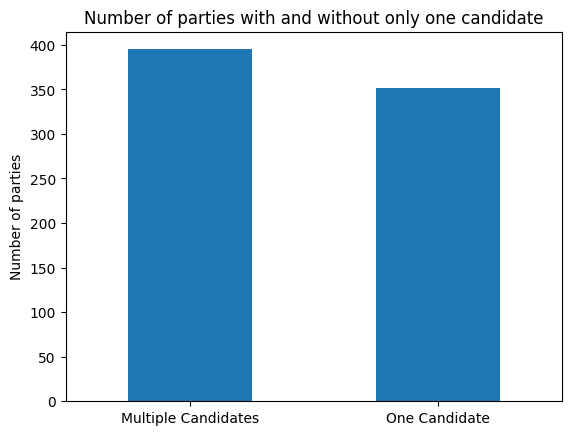

In [24]:
df_one_cand.plot.bar()
plt.title("Number of parties with and without only one candidate")
plt.xlabel("")
plt.ylabel("Number of parties")
plt.xticks(ticks= [0,1],labels = ['Multiple Candidates', 'One Candidate'], rotation = 0);


**Findings 5:**

A total of 746 unique parties(including NOTA and Indpendent candidates)
Only 351 parties had one candidate.

In [59]:
ind_pps = pd.DataFrame(R_data.groupby(R_data['State']).Party.nunique().sort_values())
ind_pps = ind_pps.sort_values('State')
ind_pps.head()

,Party
State,
Andaman & Nicobar Islands,9
Andhra Pradesh,68
Arunachal Pradesh,6
Assam,28
Bihar,98


In [26]:
ind_st = R_data.State.unique()
ind_st = pd.DataFrame(ind_st) # dataframe having all the states
ind_cps = C_data.groupby(['State']).Constituency.nunique().sort_values()
ind_cps = pd.DataFrame(ind_cps)
ind_st.head()


,0
0,Andhra Pradesh
1,Arunachal Pradesh
2,Assam
3,Bihar
4,Goa


In [27]:
df_p = pd.concat([ind_st, ind_pps], axis = 1)

In [28]:
df_p = df_p.iloc[36:]

In [29]:
df_p.head()

,0,Party
Andaman & Nicobar Islands,NaN,9.0
Andhra Pradesh,NaN,68.0
Arunachal Pradesh,NaN,6.0
Assam,NaN,28.0
Bihar,NaN,98.0


In [30]:
df_p = df_p.iloc[:, 1:2]
df_p.head()

,Party
Andaman & Nicobar Islands,9.0
Andhra Pradesh,68.0
Arunachal Pradesh,6.0
Assam,28.0
Bihar,98.0


In [31]:
df_p = df_p.reset_index()
df_p.columns = ['STATE', 'Parties']
df_p.head()

,STATE,Parties
0,Andaman & Nicobar Islands,9.0
1,Andhra Pradesh,68.0
2,Arunachal Pradesh,6.0
3,Assam,28.0
4,Bihar,98.0


**No of Parties in each state arranged in ascending order**

In [32]:
df_p = df_p.sort_values('Parties')
df_p.tail()

,STATE,Parties
31,Telangana,69.0
18,Madhya Pradesh,70.0
4,Bihar,98.0
19,Maharashtra,123.0
33,Uttar Pradesh,166.0


**FINDINGS 6:**

From the above observations , Uttar Pradesh has the highest number of parties fighting with one another.
So, Uttar Pradesh plays is the important area for the elecctions iin Lok Sabha.

In [33]:
df_p.tail()

,STATE,Parties
31,Telangana,69.0
18,Madhya Pradesh,70.0
4,Bihar,98.0
19,Maharashtra,123.0
33,Uttar Pradesh,166.0


Total number of votes

In [34]:

R_data.loc[R_data["EVM Votes"] == "-", "EVM Votes"] = 0
R_data['EVM Votes'] = pd.to_numeric(R_data['EVM Votes'])
R_data['EVM Votes'].sum()


641618937

Maximum number of votes won by each candidate

In [35]:
R_data['EVM Votes'].max()

1468549

Total number of votes casted using Postal services

In [36]:
R_data.loc[R_data['Postal Votes'] == '-', "Postal Votes"] = 0
R_data['Postal Votes'] = pd.to_numeric(R_data['Postal Votes'])
R_data['Postal Votes'].max()

19827

Maximum votes secured by a candidate through post

In [37]:
R_data['Postal Votes'].sum()

3744508

**FINDINGS 7:**

***Maximum number of votes: ***

Postal services- 3744508
Each Candidate - 1468549

**Total number of votes:**

Postal Services- 19827
Each candidate - 641618937


,State,Constituency_No,Constituency,Party,Candidate Name,Gender,Age,PC No,PC Name,Candidate,EVM Votes,Postal Votes,Total Votes,Vote Share
0,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,V.K. ABDUL AZIZ,male,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,USHA KUMARI,female,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,RINKU MALA MONDAL,female,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Indian National Congress,KULDEEP RAI SHARMA,male,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,ANAND RAMNATH ARLEKAR,male,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Independent,K VENKAT RAM BABU,male,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Socialist Unity Centre Of India (COMMUNIST),SALAMAT MONDAL,male,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,All India Anna Dravida Munnetra Kazhagam,K J B SELVARAJ,male,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Andaman Nicobar Democratic Congress,MANOJ PAUL,male,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Andaman & Nicobar Islands,1.0,Andaman & Nicobar Islands,Communist Party of India (Marxist),D AYYAPPAN,male,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
m_data1=C_data.drop(['Constituency_No','Constituency','Candidate Name','Party'],axis=1)
m_data2=R_data.drop(['Candidate','EVM Votes','Postal Votes','Party'],axis=1)

In [39]:
m_data2=R_data.drop(['Candidate','EVM Votes','Postal Votes','Party',"PC No",'PC Name','Vote Share'],axis=1)

In [40]:
df_x = m_data2.groupby('State').sum()
df_x.head()

,Total Votes
State,
Andaman & Nicobar Islands,102436780408254601722039147195425073803513421809
Andhra Pradesh,4770054264251231292575095359462813672526766604...
Arunachal Pradesh,2054171046793331430530115187821227119582296145...
Assam,4889954374121137369418933737235198830793261064...
Bihar,5234224247472322519810188161359813432121501142...


In [41]:
df_x = df_x.reset_index()
df_x.columns = ['STATE', 'Votes']
df_x.head()

,STATE,Votes
0,Andaman & Nicobar Islands,102436780408254601722039147195425073803513421809
1,Andhra Pradesh,4770054264251231292575095359462813672526766604...
2,Arunachal Pradesh,2054171046793331430530115187821227119582296145...
3,Assam,4889954374121137369418933737235198830793261064...
4,Bihar,5234224247472322519810188161359813432121501142...


In [48]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]


<ipython-input-49-952e2a5ef110>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')


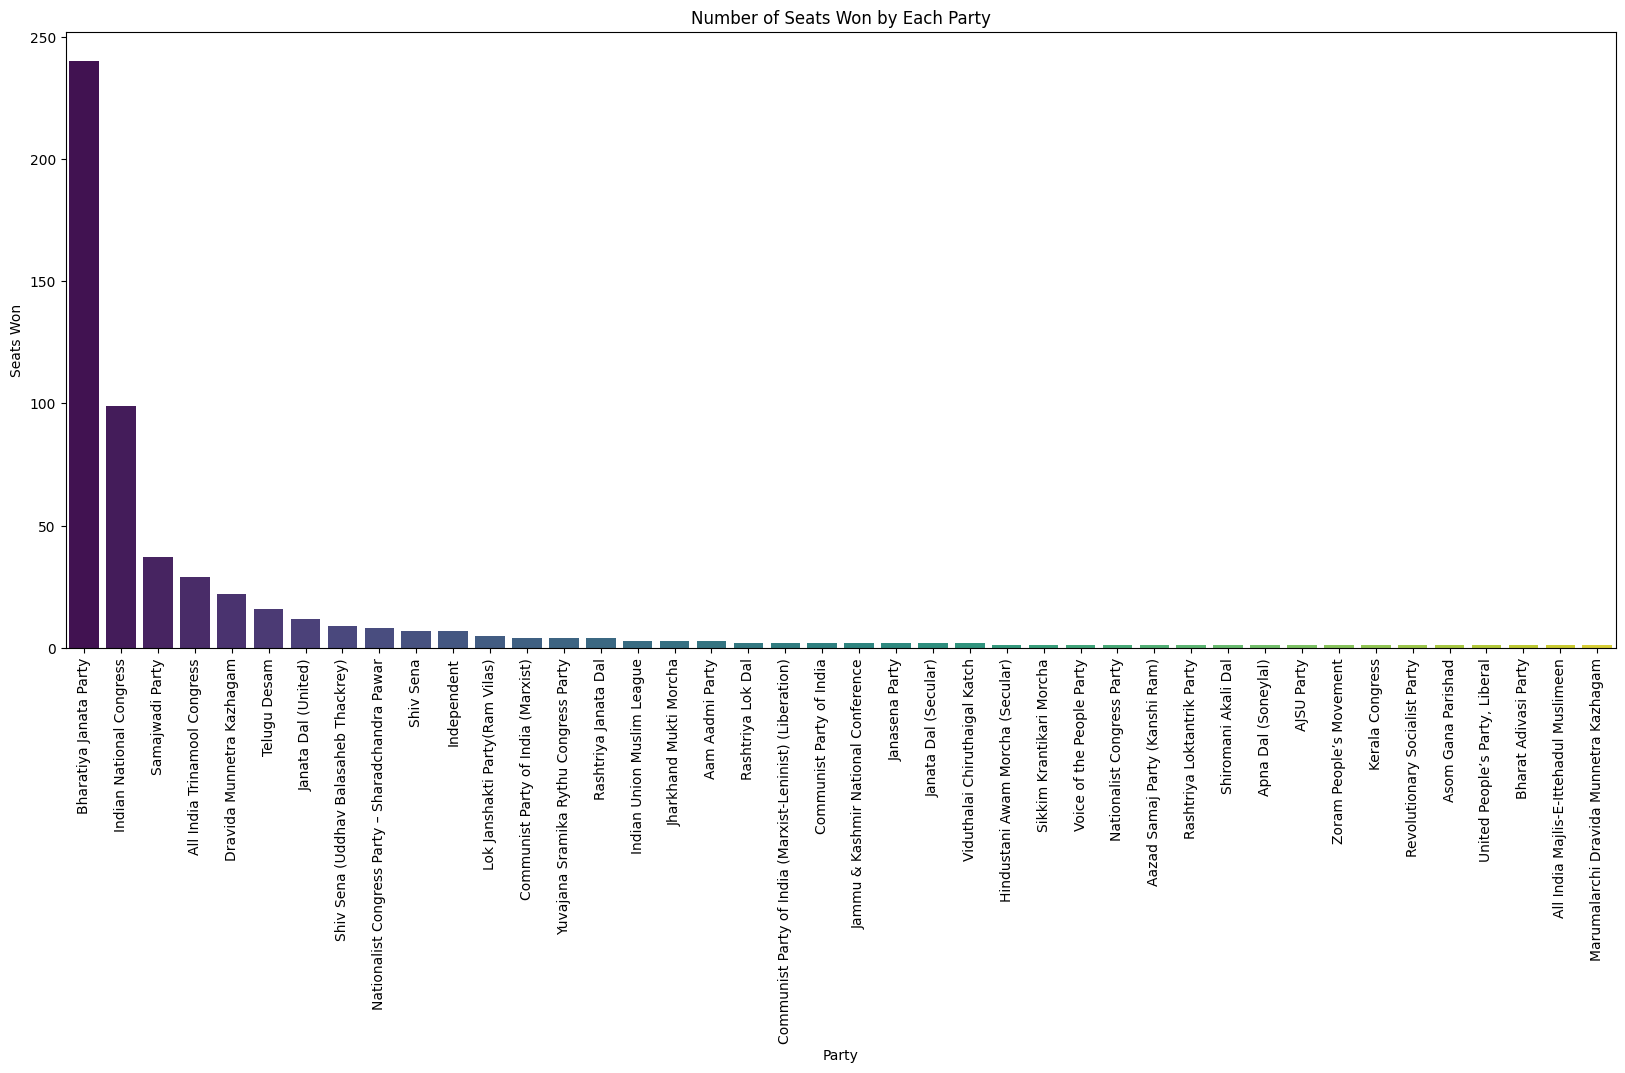

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('election_results_2024.csv')

# Convert 'Margin' column to numeric, handling non-numeric values as NaN
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()

# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

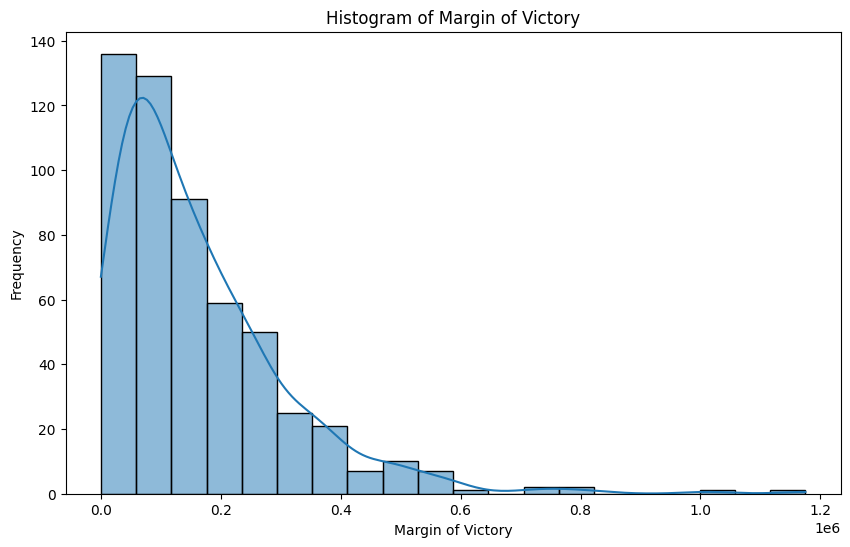

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

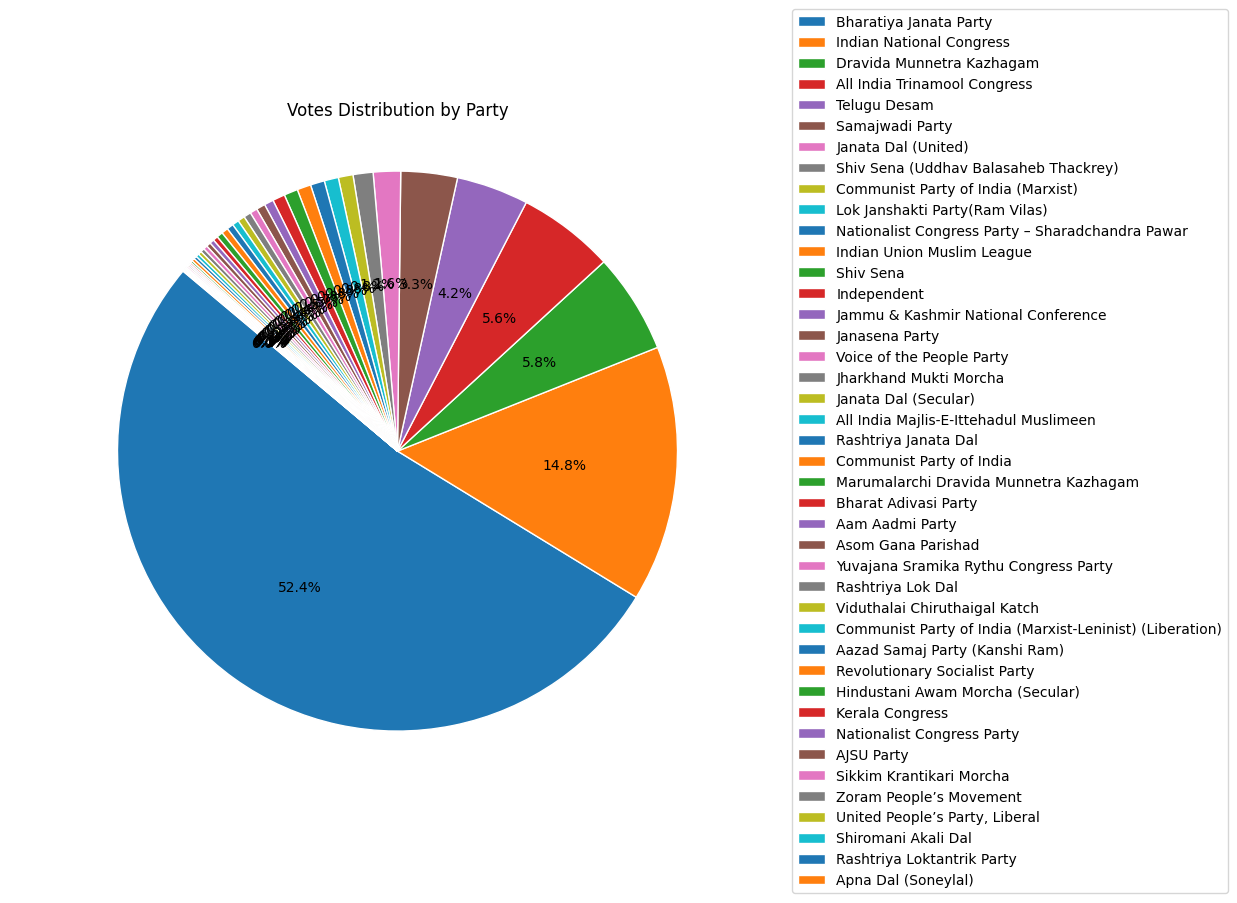

In [51]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

**Top 10 Leading Parties by Votes**

<ipython-input-52-ff8901c2245e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leading_party_votes.index[:10], y=leading_party_votes.values[:10], palette='inferno')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Dravida Munnetra Kazhagam'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Telugu Desam'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Communist Party of India (Marxist)'),
  Text(9, 0, 'Lok Janshakti Party(Ram Vilas)')])

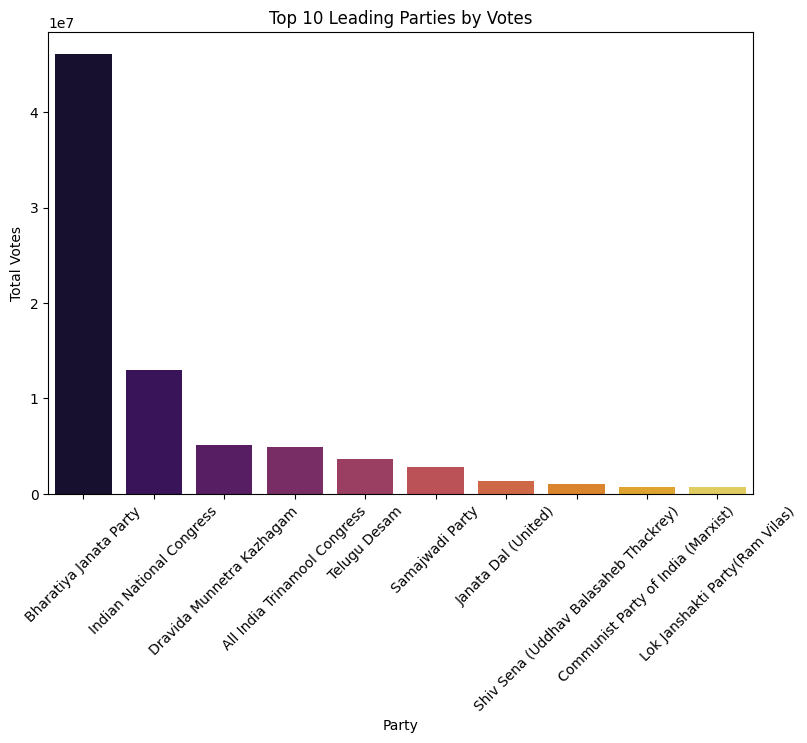

In [52]:
leading_party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
leading_party_seats = data['Leading Party'].value_counts()
plt.figure(figsize=(20, 6))

# Plot votes distribution by Leading party
plt.subplot(1, 2, 1)
sns.barplot(x=leading_party_votes.index[:10], y=leading_party_votes.values[:10], palette='inferno')
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

Top 10 Leading Parties by Seats

<ipython-input-53-fbaa5f17b1ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=leading_party_seats.index[:10], y=leading_party_seats.values[:10], palette='inferno')


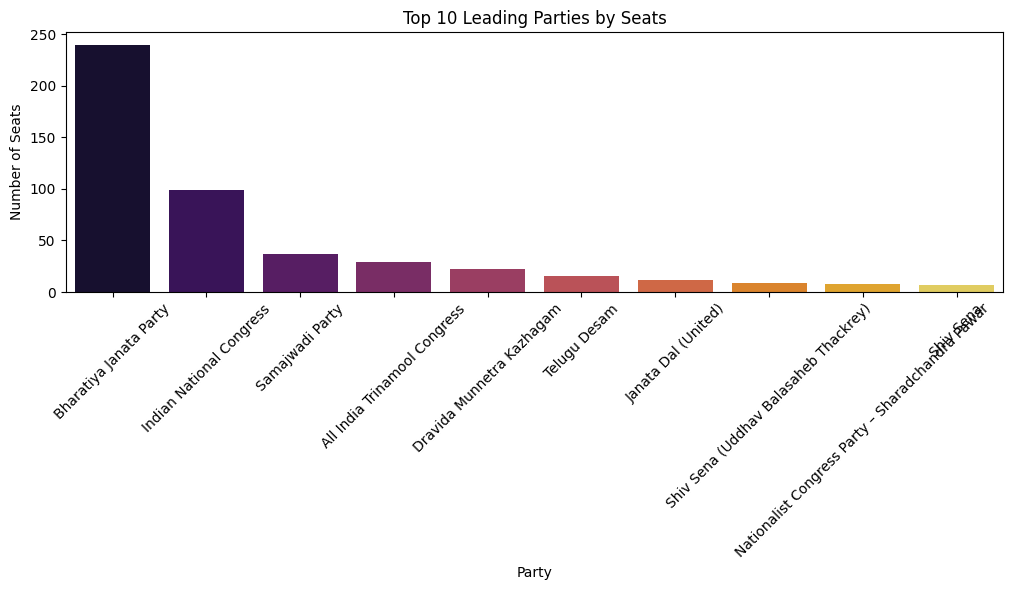

In [53]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=leading_party_seats.index[:10], y=leading_party_seats.values[:10], palette='inferno')
plt.title('Top 10 Leading Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()